In [54]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [63]:
df = pd.read_excel("insurance.xlsx")

In [64]:
df

,Age,Insurance
0,11,0
1,12,0
2,13,0
3,15,0
4,22,0
5,23,0
6,25,0
7,28,0
8,32,0
9,34,0


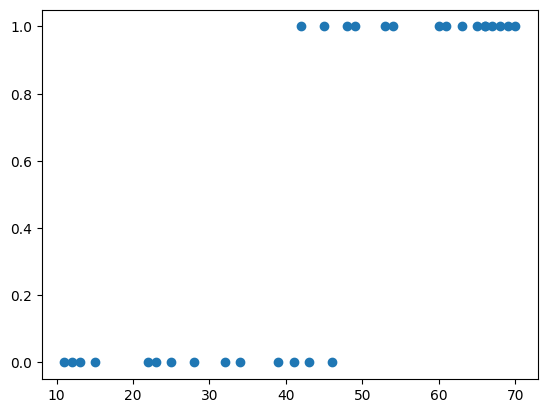

In [4]:
%matplotlib inline
plt.scatter(df["Age"], df["Insurance"])
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
model = LogisticRegression()

In [7]:
X = df.drop("Insurance", axis = 1)
y = df["Insurance"]

In [8]:
model.fit(X, y)

LogisticRegression()

In [9]:
model.predict([[45]])

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [10]:
model.predict([[35]])

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [11]:
model.predict([[70]])

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [12]:
model.predict_proba([[45], [35], [70]])

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[3.96695970e-01, 6.03304030e-01],
       [9.84442122e-01, 1.55578783e-02],
       [7.23806994e-06, 9.99992762e-01]])

In [13]:
model.predict_proba([[45]])

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.39669597, 0.60330403]])

In [14]:
model.predict_proba([[35]])

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.98444212, 0.01555788]])

In [15]:
model.predict_proba([[70]])

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.23806994e-06, 9.99992762e-01]])

In [16]:
np.argmax(model.predict_proba([[70]]))

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

In [17]:
coef = model.coef_
intercept = model.intercept_

In [18]:
coef

array([[0.45667591]])

In [19]:
intercept

array([-20.13116464])

In [20]:
s = 1 / (1 - (np.exp(-(coef * 70) + intercept)))

In [21]:
s

array([[1.]])

In [50]:
y_pred = model.predict(X)

In [52]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

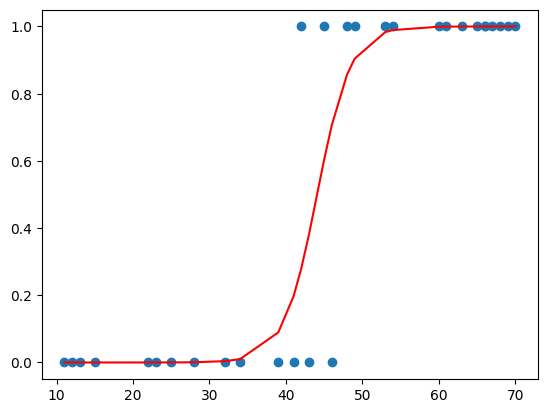

In [24]:
plt.plot(X, y_pred[:,1],"r-")
plt.scatter(X, y)
plt.show()

In [53]:
accuracy_score(y, y_pred)

0.9333333333333333

In [55]:
confusion_matrix(y, y_pred)

array([[13,  1],
       [ 1, 15]], dtype=int64)

In [56]:
import seaborn as sns

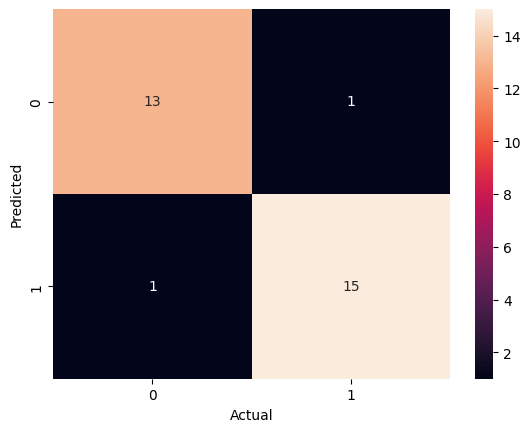

In [61]:
sns.heatmap(confusion_matrix(y, y_pred), annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [65]:
from sklearn.datasets import load_digits

In [66]:
digit = load_digits()

In [67]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [68]:
digit.data[145]

array([ 0.,  4., 15., 16., 16., 16.,  4.,  0.,  0.,  4., 16., 15.,  9.,
        7.,  1.,  0.,  0.,  0., 15., 14.,  1.,  0.,  0.,  0.,  0.,  0.,
        5., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16.,  0.,  0.,
        0.,  0.,  0.,  0.,  9., 16.,  5.,  0.,  0.,  0.,  3., 10., 13.,
       16.,  4.,  0.,  0.,  0.,  5., 16., 16., 12.,  0.,  0.,  0.])

In [69]:
digit.data[145].reshape(8,8)

array([[ 0.,  4., 15., 16., 16., 16.,  4.,  0.],
       [ 0.,  4., 16., 15.,  9.,  7.,  1.,  0.],
       [ 0.,  0., 15., 14.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 16.,  5.,  0.,  0.],
       [ 0.,  3., 10., 13., 16.,  4.,  0.,  0.],
       [ 0.,  5., 16., 16., 12.,  0.,  0.,  0.]])

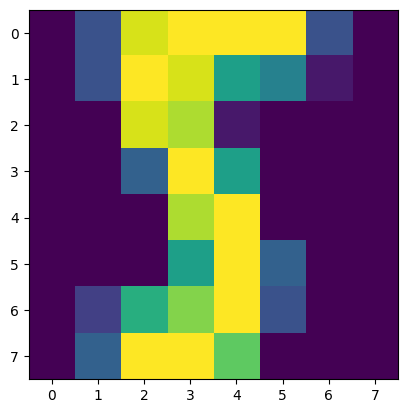

In [70]:
plt.imshow(digit.data[145].reshape(8,8))
plt.show()

In [71]:
digit.target[145]

5

In [72]:
digit.data.shape

(1797, 64)

In [73]:
digit.data[1428].reshape(8,8)

array([[ 0.,  0., 12., 16., 15.,  1.,  0.,  0.],
       [ 0.,  5., 16., 10., 15.,  8.,  0.,  0.],
       [ 0.,  1.,  7.,  3., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 12., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 13., 16.,  6.,  0.],
       [ 0.,  0.,  4.,  0.,  0., 15., 11.,  0.],
       [ 0.,  2., 16., 10., 11., 16.,  7.,  0.],
       [ 0.,  0., 10., 16., 16., 10.,  1.,  0.]])

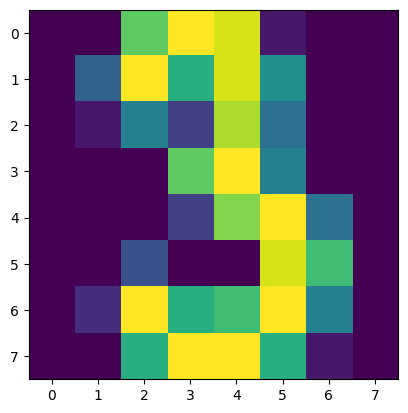

In [74]:
plt.imshow(digit.data[1428].reshape(8,8))
plt.show()

In [75]:
digit.target[1428]

3

In [76]:
df = pd.DataFrame(digit.data)

In [77]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [78]:
df["target"] = digit.target

In [79]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0,8


In [80]:
df.loc[23:28, :]

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
23,0.0,1.0,8.0,12.0,15.0,14.0,4.0,0.0,0.0,3.0,...,0.0,0.0,0.0,14.0,15.0,11.0,2.0,0.0,0.0,3
24,0.0,0.0,0.0,0.0,12.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,8.0,0.0,0.0,4
25,0.0,0.0,12.0,8.0,8.0,7.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,11.0,14.0,9.0,0.0,0.0,0.0,5
26,0.0,0.0,1.0,13.0,14.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,12.0,15.0,14.0,7.0,0.0,6
27,0.0,0.0,0.0,8.0,14.0,14.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,13.0,1.0,0.0,0.0,7
28,0.0,0.0,10.0,11.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,14.0,7.0,1.0,0.0,0.0,8


In [81]:
df["target"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [82]:
df["target"].value_counts()

target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

In [83]:
model2 = LogisticRegression()

In [84]:
model2.fit(digit.data, digit.target)

LogisticRegression()

In [85]:
model2.predict([[ 0.,  4., 15., 16., 16., 16.,  4.,  0.,  0.,  4., 16., 15.,  9.,
        7.,  1.,  0.,  0.,  0., 15., 14.,  1.,  0.,  0.,  0.,  0.,  0.,
        5., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16.,  0.,  0.,
        0.,  0.,  0.,  0.,  9., 16.,  5.,  0.,  0.,  0.,  3., 10., 13.,
       16.,  4.,  0.,  0.,  0.,  5., 16., 16., 12.,  0.,  0.,  0.]])

array([5])

In [86]:
model2.predict_proba([[ 0.,  4., 15., 16., 16., 16.,  4.,  0.,  0.,  4., 16., 15.,  9.,
        7.,  1.,  0.,  0.,  0., 15., 14.,  1.,  0.,  0.,  0.,  0.,  0.,
        5., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16.,  0.,  0.,
        0.,  0.,  0.,  0.,  9., 16.,  5.,  0.,  0.,  0.,  3., 10., 13.,
       16.,  4.,  0.,  0.,  0.,  5., 16., 16., 12.,  0.,  0.,  0.]])

array([[1.19643937e-16, 6.06347815e-11, 2.01242442e-10, 3.17815110e-07,
        3.31181386e-17, 9.99999664e-01, 1.64942191e-14, 3.49856636e-12,
        1.76354962e-08, 1.25635540e-12]])

In [87]:
np.argmax(model2.predict_proba([[ 0.,  4., 15., 16., 16., 16.,  4.,  0.,  0.,  4., 16., 15.,  9.,
        7.,  1.,  0.,  0.,  0., 15., 14.,  1.,  0.,  0.,  0.,  0.,  0.,
        5., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16.,  0.,  0.,
        0.,  0.,  0.,  0.,  9., 16.,  5.,  0.,  0.,  0.,  3., 10., 13.,
       16.,  4.,  0.,  0.,  0.,  5., 16., 16., 12.,  0.,  0.,  0.]]))

5

In [88]:
np.argmax([12, 23, 45, 8, 23, 45])

2

In [89]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [91]:
X = digit.data
y = digit.target

In [99]:
X = df.drop("target", axis = 1)
X.head(3)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


In [100]:
y = df["target"]
y.head()

0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int32

In [101]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=144)
print("Training dataset size", len(X_train))
print("Testing dataset size", len(X_test))
X_train.head(3)

Training dataset size 1437
Testing dataset size 360


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
522,0.0,0.0,1.0,14.0,15.0,4.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,1.0,12.0,16.0,16.0,9.0,0.0
827,0.0,3.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,7.0,...,5.0,0.0,0.0,4.0,16.0,16.0,16.0,13.0,3.0,0.0
82,0.0,0.0,0.0,10.0,15.0,3.0,0.0,0.0,0.0,0.0,...,14.0,2.0,0.0,0.0,1.0,9.0,15.0,16.0,11.0,0.0


In [123]:
lr = LogisticRegression()

In [124]:
lr.fit(X_train, y_train)

LogisticRegression()

In [135]:
y_pred = lr.predict(X_test)

In [137]:
y_pred.shape

(360,)

In [138]:
accuracy_score(y_test, y_pred)

0.9638888888888889

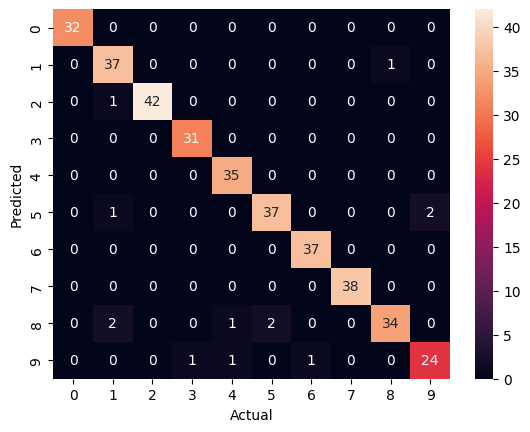

In [141]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [143]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.90      0.97      0.94        38
           2       1.00      0.98      0.99        43
           3       0.97      1.00      0.98        31
           4       0.95      1.00      0.97        35
           5       0.95      0.93      0.94        40
           6       0.97      1.00      0.99        37
           7       1.00      1.00      1.00        38
           8       0.97      0.87      0.92        39
           9       0.92      0.89      0.91        27

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

